# Decision Tree

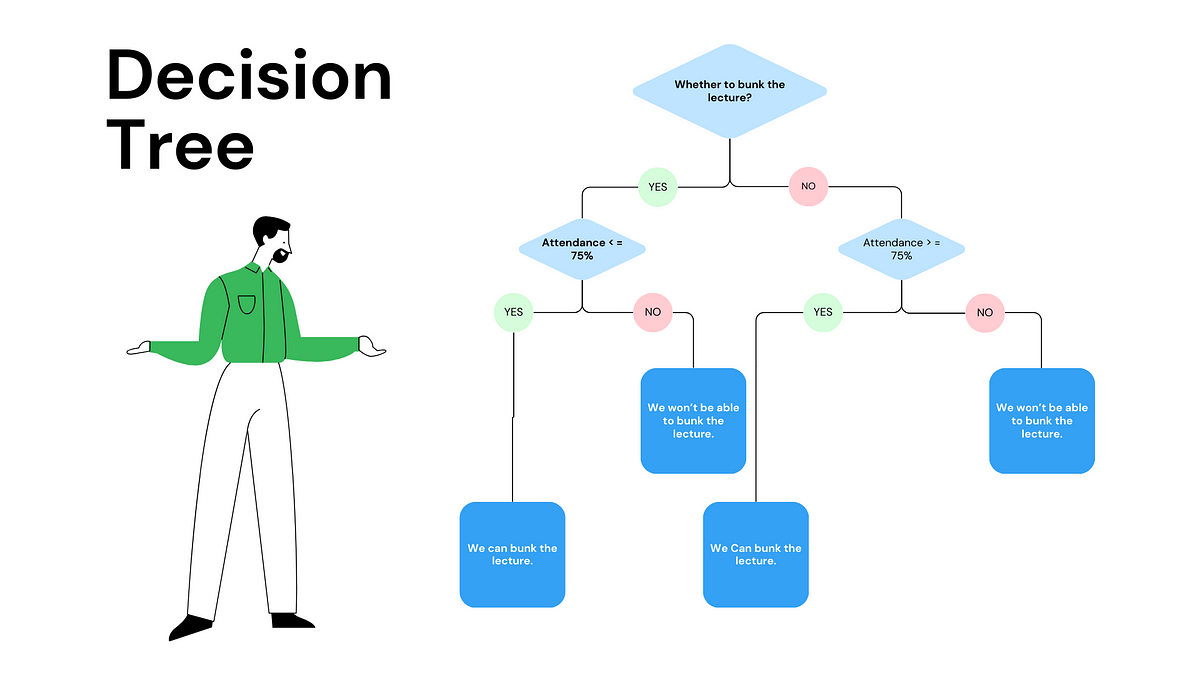

## Introduction

A Decision Tree is a supervised machine learning algorithm used for both classification and regression tasks. It models decisions and their possible consequences as a tree-like structure. Each internal node of the tree represents a decision based on a feature, each branch represents the outcome of the decision, and each leaf node represents a final class or value.

Decision Trees are intuitive and easy to interpret, making them a popular choice for many machine learning tasks.

## Preparation

Before implementing a Decision Tree, it is important to prepare the data and import necessary libraries.

1. **Import necessary libraries**:
```python
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
```

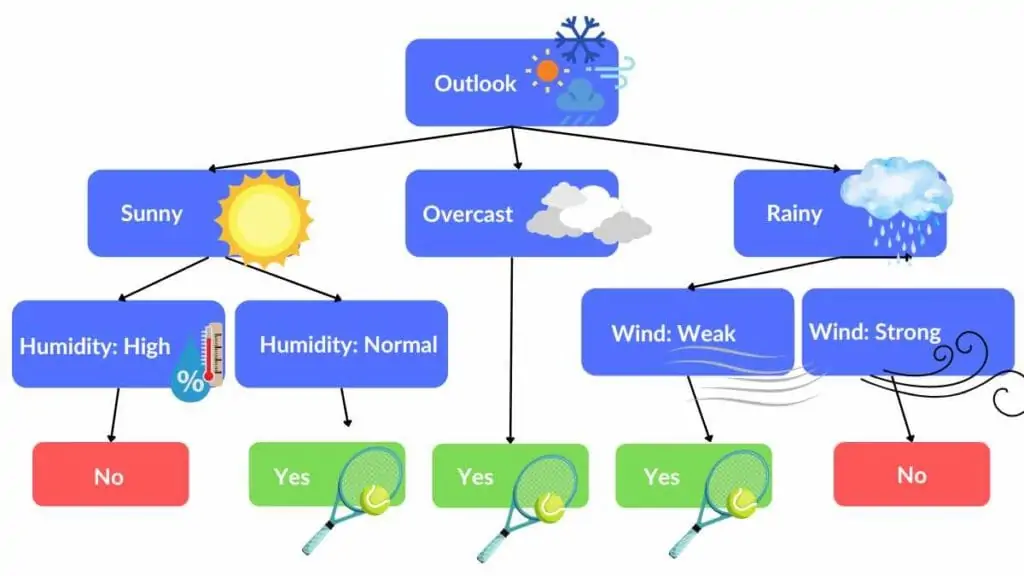

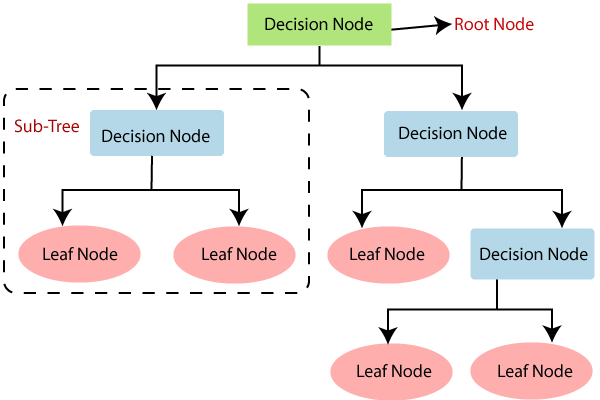

# Mathematical Intuition

### A Decision Tree makes decisions based on the following concepts:

<!-- ![image.png](attachment:image.png) -->


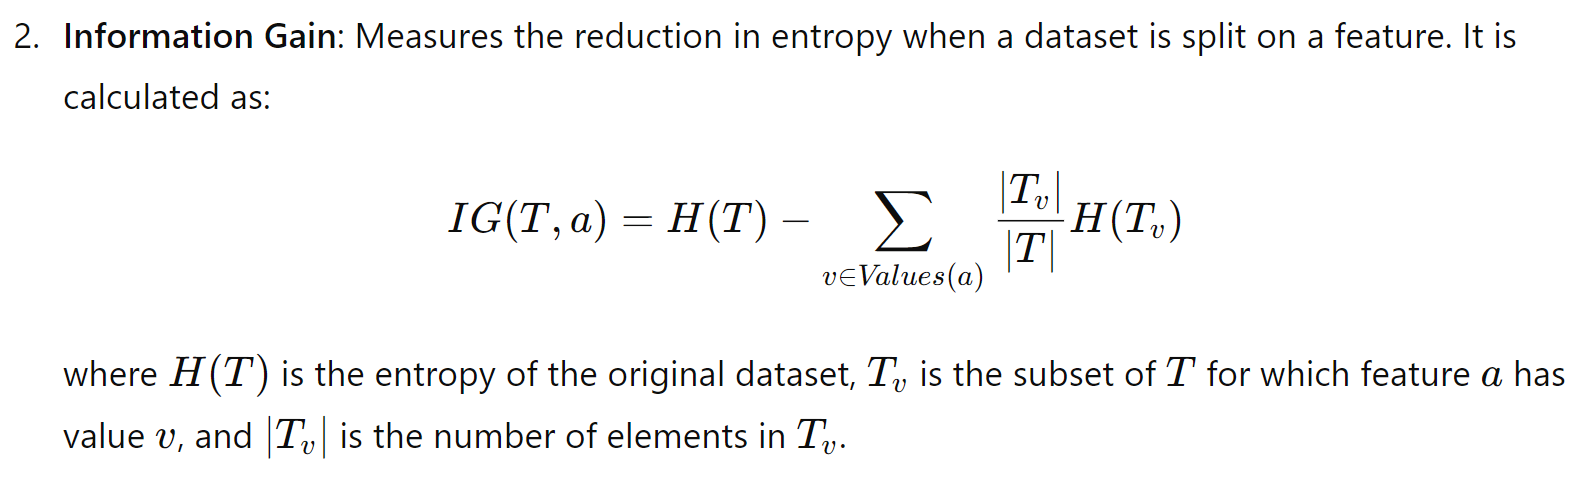


<!-- ![image-3.png](attachment:image-3.png) -->

# Load Modules

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [6]:
from sklearn.metrics import accuracy_score, \
confusion_matrix, classification_report

In [8]:
import pandas as pd


url = '''https://github.com/Hackinfinity/VTU-Machine-Learning-Lab-program-ID3-Algorithm/blob/master/PlayTennis.csv?raw=true*'''
df = pd.read_csv(url)

In [10]:
# url = 'tennis.csv'
df = pd.read_csv(url)
df.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [12]:
X = df.drop('PlayTennis',axis=1)
y = df['PlayTennis']

print(X.shape)
print(y.shape)

(14, 4)
(14,)


# Feature Engineering

In [16]:
X = pd.get_dummies(X,dtype=int,drop_first=True)
X.shape

(14, 6)

In [20]:
y = pd.get_dummies(y,dtype=int,drop_first=True)
y.shape

(14, 1)

# Train test split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# model training

In [30]:
model = DecisionTreeClassifier()

model.fit(X_train,y_train)


DecisionTreeClassifier()

In [31]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0])

In [32]:
model.score(X_test,y_test)

0.6666666666666666

In [33]:
accuracy_score(y_test,y_pred)

0.6666666666666666

In [36]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1, 0],
       [1, 1]], dtype=int64)

<Axes: >

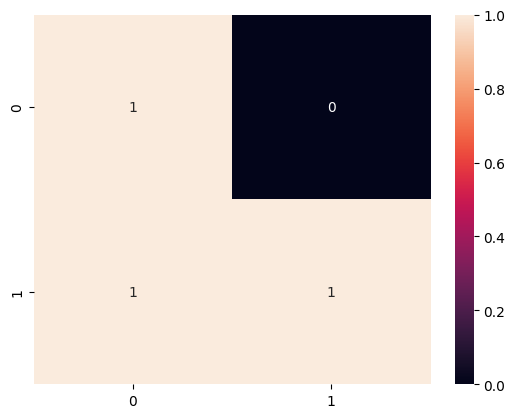

In [38]:
import seaborn as sns

sns.heatmap(cm,annot=True)


In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



# Load the dataset:

In [5]:
# Example: Load the Iris dataset
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target


# Split the dataset:

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Fit the Decision Tree model:

In [7]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

# Predict the class labels:

In [8]:
y_pred = model.predict(X_test)


In [9]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

# Evaluate the model:

In [11]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [12]:
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [13]:
print(f"Confusion Matrix:\n{cm}")

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [14]:
print(f"Classification Report:\n{cr}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Conclusion
Decision Trees are a powerful and versatile machine learning algorithm for classification and regression tasks. They are easy to interpret and can handle both numerical and categorical data. By understanding the preparation, mathematical intuition, workflow, and implementation of Decision Trees, you can apply this method to various machine learning tasks effectively.

However, Decision Trees have a tendency to overfit, especially when they grow deep. Techniques like pruning, ensemble methods (e.g., Random Forests), and setting constraints (e.g., maximum depth) can help mitigate this issue.

# Entropy and Gini Impurity in Decision Trees

## Introduction

Entropy and Gini Impurity are two key metrics used in Decision Tree algorithms to determine the best splits at each node. Both metrics measure the purity or impurity of a dataset and help in making decisions to split the data to build the most accurate model.

## Entropy

### Definition

Entropy is a measure of impurity or randomness in a dataset. It is used to quantify the uncertainty involved in predicting the class of a given dataset.

### Mathematical Formula

Entropy (H) is calculated using the following formula:

\[
H(S) = - \sum_{i=1}^{c} p_i \log_2(p_i)
\]

where:
- \( S \) is the set of instances (dataset),
- \( c \) is the number of classes,
- \( p_i \) is the proportion of instances in class \( i \).

### Example

Consider a dataset with two classes, positive and negative, with the following distribution:
- 4 positive instances
- 6 negative instances

The entropy of this dataset is calculated as follows:

\[
H(S) = - \left( \frac{4}{10} \log_2 \frac{4}{10} + \frac{6}{10} \log_2 \frac{6}{10} \right)
     = - \left( 0.4 \log_2 0.4 + 0.6 \log_2 0.6 \right)
     \approx 0.971
\]

### Interpretation

- Entropy = 0: The dataset is completely pure (all instances belong to the same class).
- Higher entropy: More uncertainty or impurity in the dataset.

## Gini Impurity

### Definition

Gini Impurity is another measure of impurity used by the CART (Classification and Regression Tree) algorithm. It measures the likelihood of incorrect classification of a randomly chosen element if it was randomly labeled according to the distribution of labels in the dataset.

### Mathematical Formula

Gini Impurity (G) is calculated using the following formula:

\[
G(S) = 1 - \sum_{i=1}^{c} p_i^2
\]

where:
- \( S \) is the set of instances (dataset),
- \( c \) is the number of classes,
- \( p_i \) is the proportion of instances in class \( i \).

### Example

Using the same dataset as before with two classes, positive and negative, the Gini Impurity is calculated as follows:

\[
G(S) = 1 - \left( \left( \frac{4}{10} \right)^2 + \left( \frac{6}{10} \right)^2 \right)
     = 1 - \left( 0.16 + 0.36 \right)
     = 1 - 0.52
     = 0.48
\]

### Interpretation

- Gini Impurity = 0: The dataset is completely pure.
- Higher Gini Impurity: More uncertainty or impurity in the dataset.

## Comparison

- **Range**: Both metrics range from 0 (pure) to 1 (impure).
- **Sensitivity**: Entropy is more sensitive to changes in the distribution of classes than Gini Impurity.
- **Usage**: Decision Trees can use either Entropy or Gini Impurity to determine splits. The choice depends on the specific implementation and the problem at hand.

## Example in Python

Let's see how to calculate Entropy and Gini Impurity using Python.

### Calculation of Entropy

```python
import numpy as np

# Function to calculate entropy
def entropy(p):
    return -np.sum(p * np.log2(p))

# Example distribution
p = np.array([4/10, 6/10])

# Calculate entropy
entropy_value = entropy(p)
print(f"Entropy: {entropy_value}")
